## Prudential risk prediction

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

We will work with a dataset published by an insurance company which contains anonymised information about their clients.

The aim is to predict people's risk profile based on their properties.

You will be given a description of the data set and the goal is to develop a prediction model.

##  Dataset

The data provided consists of three csv files in the `data/` folder:
* `X_train.csv`: the training set
* `y_train.csv`: the target for the training set, valued from 1 to 8
* `X_test.csv`: the test set that will be evaluated

Below we give the description of the data features, some categorical, others numerical. The dataset has been thoroughly anonymized, which makes it extra challenging. 

Although the risk profile is ordered, we will consider this problem as being a classification problem and the exact category accuracy will be used for evaluating your model. It has low signal, and a 8-classes classification problem, hence accuracy can be quite low.

## Get Started

Your task is to train a model to predict the target variable. You should save the predictions for the test set in the variable called `y_pred`, which will be evaluated against the ground truth. Below we give you a sample baseline implementation.

You are free to use all your modelling skills to get the best possible performance.

Good luck!

### Dataset info

**Variable descriptions:**
- Id - A unique identifier associated with an application.
- Product_Info_1-7 - A set of normalized variables relating to the product applied for
- Ins_Age - Normalized age of applicant
- Ht - Normalized height of applicant
- Wt - Normalized weight of applicant
- BMI - Normalized BMI of applicant
- Employment_Info_1-6 - A set of normalized variables relating to the employment history of the applicant.
- InsuredInfo_1-6 - A set of normalized variables providing information about the applicant.
- Insurance_History_1-9 - A set of normalized variables relating to the insurance history of the applicant.
- Family_Hist_1-5 - A set of normalized variables relating to the family history of the applicant.
- Medical_History_1-41 - A set of normalized variables relating to the medical history of the applicant.
- Medical_Keyword_1-48 - A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
- Response - This is the target variable, an ordinal variable relating to the final decision associated with an application

**Categorical (nominal) features:**
```
Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41
```

**Continuous features:**
```
Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5
```

**Discrete features:**
```
Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32
Medical_Keyword_1-48 are dummy variables.
```

### Baseline model

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Load data

In [20]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
X_test = pd.read_csv("data/X_test.csv")

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(44535, 126)
(14846, 126)
(44535, 1)


In [22]:
X_train.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,D3,26,0.487179,2,3,1,0.208955,0.745455,0.257322,...,0,0,0,0,0,0,0,0,0,0
1,1,A2,15,0.076923,2,3,1,0.089552,0.654545,0.246862,...,0,0,0,0,0,0,0,0,0,0
2,1,D4,26,0.230769,2,3,1,0.447761,0.781818,0.320084,...,0,0,0,0,0,0,0,0,0,0
3,1,D3,26,1.000000,2,1,1,0.373134,0.709091,0.269874,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,29,0.076923,2,1,1,0.328358,0.672727,0.430962,...,0,1,0,0,0,0,0,0,0,0


In [23]:
y_train

,Response
0,6
1,8
2,5
3,8
4,2
...,...
44530,1
44531,8
44532,6
44533,8


# Target

Plot a distribution of the target

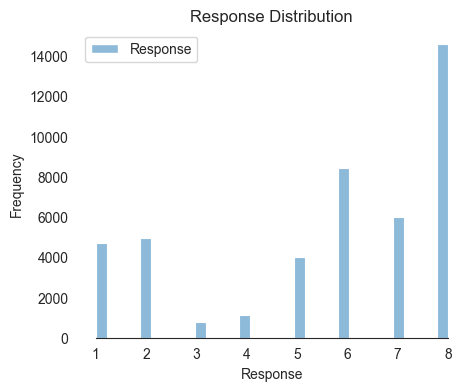

In [24]:
sns.set_style("white")
sns.set_color_codes(palette = 'deep')
figure, ax = plt.subplots(figsize = (5, 4))
sns.histplot(y_train)
ax.set(ylabel = "Frequency")
ax.set(xlabel = "Response")
ax.set(title = "Response Distribution")
sns.despine(trim = True, left = True)  # remove left border from plot
plt.show()

# Prep data

Combine the train and test for pre-processing

In [25]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
X.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,D3,26,0.487179,2,3,1,0.208955,0.745455,0.257322,...,0,0,0,0,0,0,0,0,0,0
1,1,A2,15,0.076923,2,3,1,0.089552,0.654545,0.246862,...,0,0,0,0,0,0,0,0,0,0
2,1,D4,26,0.230769,2,3,1,0.447761,0.781818,0.320084,...,0,0,0,0,0,0,0,0,0,0
3,1,D3,26,1.000000,2,1,1,0.373134,0.709091,0.269874,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,29,0.076923,2,1,1,0.328358,0.672727,0.430962,...,0,1,0,0,0,0,0,0,0,0


# Missing values

Find where the null values are

In [26]:
def percent_missing(df):
    """
    Determine the percentage of missing values in each column of a data frame
    
    Args:
        df (pandas dataframe) : dataframe we want to inspect
    
    Returns:
        dict_x (dict{}) : dictionary mapping column names to percentage values missing in column
    """
    dict_x = {}
    for i in range(0, len(df.columns)):
        dict_x[df.columns[i]] = round(df[df.columns[i]].isnull().mean()*100, 2)
    return dict_x

missing = percent_missing(X)
df_miss = sorted(missing.items(), key = lambda x : x[1], reverse = True)  # reverse sort
print("Percentage of missing data")
for i in df_miss:
    if(i[1] > 0): print(i)

Percentage of missing data
('Medical_History_10', 99.06)
('Medical_History_32', 98.14)
('Medical_History_24', 93.6)
('Medical_History_15', 75.1)
('Family_Hist_5', 70.41)
('Family_Hist_3', 57.66)
('Family_Hist_2', 48.26)
('Insurance_History_5', 42.77)
('Family_Hist_4', 32.31)
('Employment_Info_6', 18.28)
('Medical_History_1', 14.97)
('Employment_Info_4', 11.42)
('Employment_Info_1', 0.03)


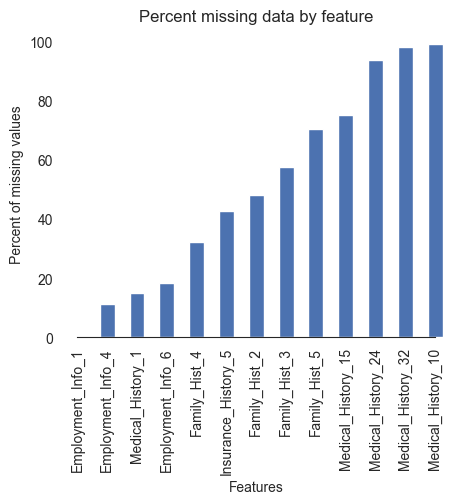

In [27]:
# set up figure with colour formatting
sns.set_style("white")
fig, ax = plt.subplots(figsize=(5, 4))
sns.set_color_codes(palette='deep')

# determine columns with more than one missing value and sort in increasing orber
missing = round(X.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")

# tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

Drop columns with missing values

In [28]:
def handle_missing(features):

    # categorical
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
    
    # numerical
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features

X = handle_missing(X)
X.isnull().values.any()

False

# Categorical features

In [29]:
X = pd.get_dummies(X)

# Recreate train and test

In [30]:
def extract_train_and_test(X, y_train):
    """
    Extract the train and test sets from the combined data
    
    Args:
        X (pandas dataframe) : dataframe to split up
        target (pandas series) : target data
        
    Return:
        X_test (pandas dataframe) : test data
        X_train (pandas dataframe) : train data
    """
    X_train = X.iloc[:len(y_train), :]
    X_test = X.iloc[len(y_train):, :]
    return X_train, X_test

X_train, X_test = extract_train_and_test(X, y_train)

Check for null values

In [31]:
X_train.isnull().values.any(), X_test.isnull().values.any(), y_train.isnull().values.any()

(False, False, False)

# Model

In [32]:
kf = KFold(n_splits = 12, random_state = 42, shuffle = True)

Define models

In [33]:
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=4,
                       learning_rate=0.01, 
                       n_estimators=5000,
                       max_bin=200, 
                       bagging_fraction=0.75,
                       bagging_freq=5, 
                       bagging_seed=7,
                       feature_fraction=0.2,
                       feature_fraction_seed=7,
                       verbose=-1)

Score models

Fit models

In [34]:
print('xgboost')
xgb_model_full_data = lightgbm.fit(X_train, y_train)

xgboost
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


Blend models

Predict

In [37]:
y_pred = np.floor(lightgbm.predict(X_test))

In [38]:
y_pred

array([6., 5., 2., ..., 4., 6., 2.])